In [1]:
#updated file
import pandas as pd

In [25]:
! pip install git+https://git@github.com/weecology/retriever.git
! retriever install csv mapped-plant-quads-co

  Cloning https://git@github.com/weecology/retriever.git to /private/var/folders/t_/wmc6g5_j7tvfq8hfwcc6r02w0000gn/T/pip-v9gz9lly-build
=> Installing Shortgrass steppe mapped plants quads - Chu et al. 2013
Progress: 14 / 14 rows inserted into ./mapped_plant_quads_co_quad_inventory.csv totaling 14:

Progress: 400 / 28243 rows inserted into ./mapped_plant_quads_co_allrecords_density.csv totaling 28243:Progress: 800 / 28243 rows inserted into ./mapped_plant_quads_co_allrecords_density.csv totaling 28243:Progress: 1200 / 28243 rows inserted into ./mapped_plant_quads_co_allrecords_density.csv totaling 28243:

In [26]:
plant_species = pd.read_csv('mapped_plant_quads_co_species_list.csv')
plant_species.head()

,species,density,cover,growthform,longevity
0,Achillea millefolium,2.0,NaN,forb,P
1,Agropyron smithii,4649.0,NaN,grass,P
2,Allium spp.,18.0,NaN,forb,P
3,Allium textile,73.0,NaN,forb,P
4,Ambrosia psilostachya,2.0,NaN,forb,P


In [27]:
plant_quad = pd.read_csv("mapped_plant_quads_co_quad_info.csv")
plant_quad.head()

,quadrat,pasture,latitude,longitude,elevation,before1997,from1997
0,gzgz_11,11,40.842943,-104.744032,1656,grazed,grazed
1,gzgz_19,19,40.823798,-104.710306,1633,grazed,grazed
2,gzgz_24,24,40.822824,-104.729504,1650,grazed,grazed
3,gzgz_5a,5a,40.868138,-104.690792,1657,grazed,grazed
4,gzgz_5b,5b,40.867662,-104.680630,1661,grazed,grazed


#### A plot of the area covered by each species over all quadrats (y) for each year (x).

In [28]:
all_records = pd.read_csv("mapped_plant_quads_co_allrecords_cover.csv")
all_records.head()

,quad,year,species,area,x,y
0,gzgz_11,1997,Corner plate,0.001863,0.021345,0.977800
1,gzgz_11,1997,Bare ground,0.013359,0.086730,0.946482
2,gzgz_11,1997,Bouteloua gracilis,0.000169,0.167067,0.996623
3,gzgz_11,1997,Bouteloua gracilis,0.014171,0.343203,0.963770
4,gzgz_11,1997,Bare ground,0.001982,0.377101,0.987494


In [29]:
species_year = all_records.groupby(['species','year'], as_index = False).area.sum()
species_year.head()

,species,year,area
0,Ant hill,1998,0.011008
1,Ant hill,1999,0.014806
2,Ant hill,2000,0.006458
3,Ant hill,2001,0.013366
4,Ant hill,2002,0.003034


In [32]:
species_year_wide = species_year.pivot(index = 'year', columns = 'species', values = 'area')


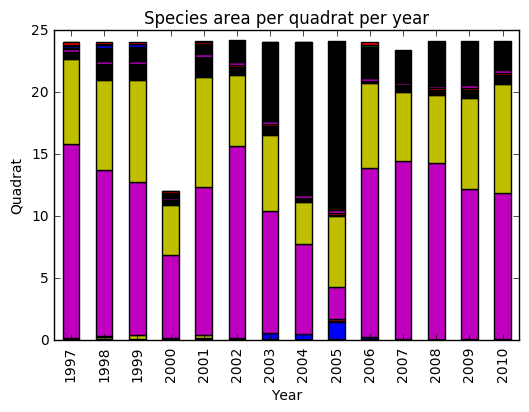

In [35]:
%matplotlib inline
species_year_plot = species_year_wide.plot(kind ='bar', stacked = True, legend = False, 
                  title = "Species area per quadrat per year")
species_year_plot.set_xlabel("Year")
species_year_plot.set_ylabel("Quadrat")

#### A plot of the area covered by each growth-form over all quadrats (y) for each year (x).

#### A plot of the area covered by each growth-form over all quadrats (y) as a function of the mean precipitation for the year (x).

#### At least one additional plot investigating the relationship between plant composition (e.g. species or growth form) and another variable.